### import libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
#import torchsummary
import preprocessing
import cnn

In [2]:
 #conda install -c conda-forge pytorch-model-summary 

### set device

In [18]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda
cuda


### set hyperparameters

In [17]:
#in_channels = 1    # 28x28 = 784, size of MNIST images (grayscale)
#hidden_size = 100
num_classes = 24
learning_rate = 0.001
batch_size = 200
num_epochs = 50

### preprocess data using custom Dataset

In [5]:
my_transforms = torchvision.transforms.Compose([
                                                #torchvision.transforms.RandomHorizontalFlip(),
                                                #torchvision.transforms.RandomRotation(10),
                                                preprocessing.ToTensor(), 
                                                #torchvision.transforms.Normalize(110, 110)
                                                ])

training_data = preprocessing.SignDataset(csv_path="data/sign_mnist_train.csv", transform=my_transforms)
test_data = preprocessing.SignDataset(csv_path="data/sign_mnist_test.csv", transform=my_transforms)

### vislualizing the Dataset

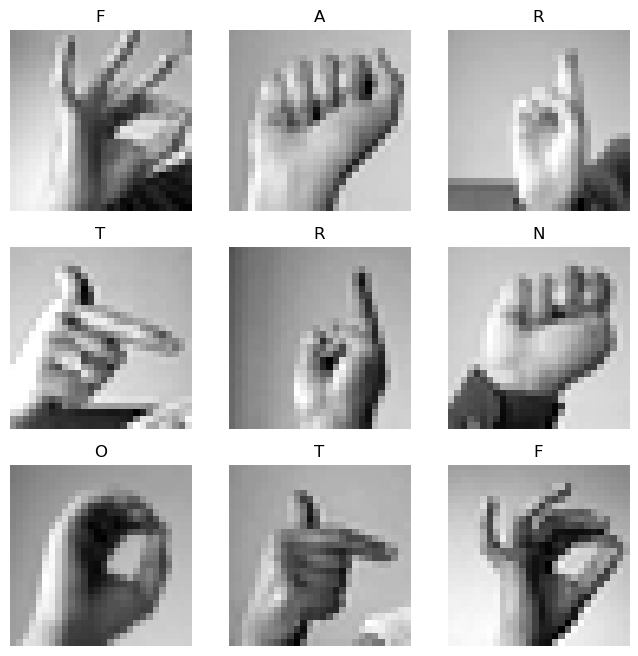

In [6]:
import matplotlib.pyplot as plt

labels_map = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 
    6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M",
    12: "N", 13: "O", 14: "P", 15: "Q", 16: "R", 17: "S",
    18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label.item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader

In [7]:
train_dataloader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

### iterate through the DataLoader

Feature batch shape : torch.Size([200, 1, 28, 28])
Labels batch shape  : torch.Size([200])


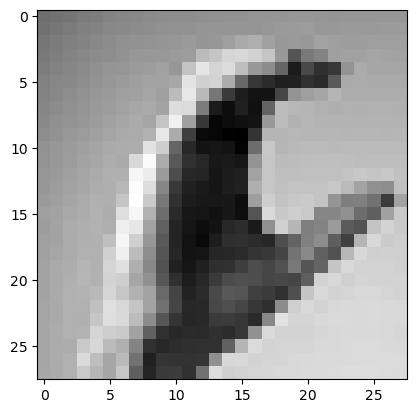

Label: C


In [8]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape  : {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

### data summary

In [9]:
print('type(train_dataloader):', type(train_dataloader))
print('----------------------------------')
print('data_iter = iter(train_dataloader)')
data_iter = iter(train_dataloader)
print('----------------------------------')
print('single_batch = data_iter.next()')
single_batch = data_iter.next()
print('type(single_batch) :', type(single_batch))
#print('len(single_batch)  :', len(single_batch))
print('----------------------------------')
print('images, labels = single_batch')
images, labels = single_batch
print('images.shape:', images.shape)
print('labels.shape:', labels.shape)
print('type(labels[0]):', type(labels[0]))

type(train_dataloader): <class 'torch.utils.data.dataloader.DataLoader'>
----------------------------------
data_iter = iter(train_dataloader)
----------------------------------
single_batch = data_iter.next()
type(single_batch) : <class 'list'>
----------------------------------
images, labels = single_batch
images.shape: torch.Size([200, 1, 28, 28])
labels.shape: torch.Size([200])
type(labels[0]): <class 'torch.Tensor'>


### Initialize network

In [10]:
# Create the network and look at it's text representation
net = cnn.ConvNN().to(device)
#torchsummary.summary(net, (1, 28, 28))

In [11]:
net

ConvNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=270, out_features=270, bias=True)
  (fc2): Linear(in_features=270, out_features=24, bias=True)
  (softmax): LogSoftmax(dim=1)
)

### train the model

In [12]:
trained_model = cnn.train(
    loader=train_dataloader, 
    model=net, 
    num_epochs=num_epochs, 
    learning_rate=learning_rate, 
    device=device
    )

### model performance

In [13]:
cnn.get_accuracy(loader=train_dataloader, model=trained_model,device=device)
cnn.get_accuracy(loader=test_dataloader, model=trained_model, device=device)

Correct: [20606 / 27455] with accuracy 75.05 %
Correct: [4877 / 7172] with accuracy 68.00 %


In [14]:
#import torch
#x = torch.rand(5, 3)
#print(x)


In [15]:
#torch.version.cuda


In [16]:
#conda install pytorch torchvision torchaudio cudatoolkit=11.6 -c pytorch -c conda-forge